# Confusion matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATASET_URL = 'https://raw.githubusercontent.com/ne1s0n/bioinformateachers/refs/heads/main/dlb/data/predictions.csv'

In [3]:
bc_data = pd.read_csv(DATASET_URL)
bc_data.head()

,y_test,y_pred,y_pred_mod2,prob_0,prob1,prob0_mod2,prob1_mod2
0,1.0,1.0,1.0,0.013791,0.986209,5.324544e-07,9.999995e-01
1,1.0,1.0,1.0,0.022589,0.977411,2.213058e-01,7.786942e-01
2,1.0,1.0,1.0,0.340036,0.659964,3.150935e-01,6.849065e-01
3,0.0,0.0,0.0,0.999988,0.000012,9.999999e-01,1.000000e-07
4,1.0,1.0,1.0,0.029998,0.970002,9.621843e-02,9.037816e-01


In [23]:
from sklearn.metrics import confusion_matrix

predictions = bc_data['y_pred']
observations = bc_data['y_test']

predicted_labels = np.where(predictions == 1.0, "case", "control")
target_labels = np.where(observations == 1.0, "case", "control")

In [47]:
from operator import index

labs, counts = np.unique(predicted_labels, return_counts=True)
dict1 = {k:v for (k,v) in zip(labs,counts)}
dict1['set'] = 'predictions'

labs, counts = np.unique(target_labels, return_counts=True)
dict2 = {k:v for (k,v) in zip(labs,counts)}
dict2['set'] = 'observations'


pd.DataFrame.from_records([dict1,dict2])

,case,control,set
0,76,38,predictions
1,73,41,observations


 (CM) | pred- | pred+ |
------|-------|-------|
 obs- | TN    | FP    |
 obs+ | FN    | TP    |


```

      | pred - | pred +
------|--------|--------
obs - |   TN   |   FP
obs + |   FN   |   TP


```

In [52]:
conf_mat_df = confusion_matrix(predicted_labels, target_labels, labels=["control","case"])
print(conf_mat_df)

[[34  4]
 [ 7 69]]


In [58]:
## sanity check
## let's get the n. of true positives (y_test == 1 AND y_pred == 1)
bc_data.loc[(bc_data['y_test'] == 1) & (bc_data['y_pred'] == 1)].shape[0]

69

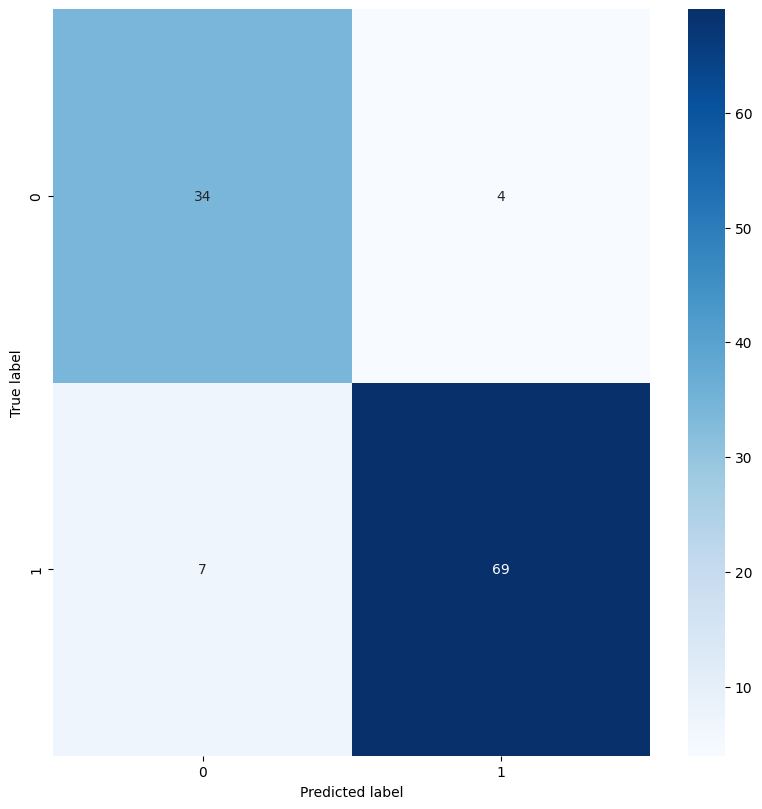

In [59]:
import seaborn as sn

figure = plt.figure(figsize=(8, 8))
sn.heatmap(conf_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [64]:
conf_mat_norm = confusion_matrix(target_labels, predicted_labels, normalize='true', labels=["control","case"])
print(conf_mat_norm)

[[0.82926829 0.17073171]
 [0.05479452 0.94520548]]


In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm)

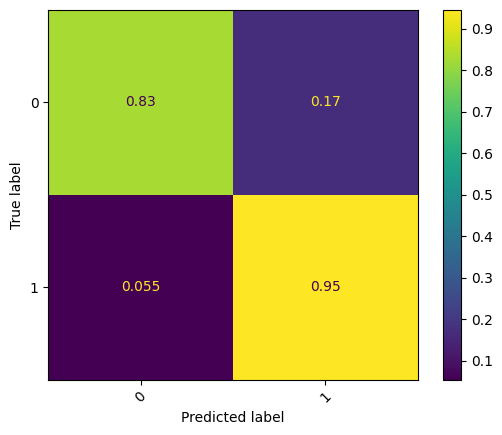

In [67]:
disp.plot(xticks_rotation=45)